In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read & Extract Data
def get_vars(file: str):
    with open(file, 'r') as f:
        text = f.read()

    val_acc_match = re.search(r'val\s*acc:\s*(\d+\.\d+)', text)
    test1_acc_match = re.search(r'test1\s*acc:\s*(\d+\.\d+)', text)
    test2_acc_match = re.search(r'test2\s*acc:\s*(\d+\.\d+)', text)
    test3_acc_match = re.search(r'test3\s*acc:\s*(\d+\.\d+)', text)
    if val_acc_match:
        val_acc = float(val_acc_match.group(1))
    else:
        val_acc = None
    if test1_acc_match:
        test1_acc = float(test1_acc_match.group(1))
    else:
        test1_acc = None
    if test2_acc_match:
        test2_acc = float(test2_acc_match.group(1))
    else:
        test2_acc = None
    if test3_acc_match:
        test3_acc = float(test3_acc_match.group(1))
    else:
        test3_acc = None
    return val_acc, test1_acc, test2_acc, test3_acc

In [3]:
# Test
folder = '../results/code_completion/different_author/codellama/checkpoints'
ckpt = os.listdir(folder)[-1]
file = os.path.join(folder, ckpt, 'parameters.txt')

val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
print(val_acc, test1_acc, test2_acc, test3_acc)

None 73.23380279541016 71.77117919921875 74.64290618896484


### Method Name Prediction

In [ ]:
S = ['Different timelines', 'Different authors', 'Different projects']
# Rename the shift intensity names
shift_intensity_names = {
    'val_acc': 'In-dist.',
    'test1_acc': '1',
    'test2_acc': '2',
    'test3_acc': '3'
}

# res = []
# for shift in SHIFT:
#     for model in MODEL:
#         folder = f'../results/{TASK}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': 'method name prediction',
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc * 100,
#             'test1_acc': test1_acc * 100,
#             'test2_acc': test2_acc * 100,
#             'test3_acc': test3_acc * 100, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

In [ ]:
T = 'Method name prediction'
M = ['code2vec', 'coderoberta', 'graphcodebert']
res = [
    {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 55.390715, 'test1_acc': 54.890607, 'test2_acc': 54.030440, 'test3_acc': 53.241443},
    {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 57.966928, 'test1_acc': 56.587331, 'test2_acc': 56.468104, 'test3_acc': 55.701203},
    {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 59.893170, 'test1_acc': 58.682512, 'test2_acc': 58.427443, 'test3_acc': 57.225624},
    {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 54.485417, 'test1_acc': 52.617400, 'test2_acc': 51.119681, 'test3_acc': 50.704190},
    {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 58.502033, 'test1_acc': 55.334419, 'test2_acc': 53.139589, 'test3_acc': 51.314860},
    {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 59.686326, 'test1_acc': 57.082575, 'test2_acc': 54.806566, 'test3_acc': 53.490697},
    {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 55.254494, 'test1_acc': 51.080404, 'test2_acc': 49.660021, 'test3_acc': 46.890228},
    {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 57.964759, 'test1_acc': 52.417149, 'test2_acc': 51.363183, 'test3_acc': 47.699799},
    {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 59.903500, 'test1_acc': 54.766733, 'test2_acc': 52.318322, 'test3_acc': 49.123829},
]
df = pd.DataFrame(res)

# Melt the dataframe to convert it into the long format
melted_df = pd.melt(
    df, 
    id_vars=['Task', 'Shift type', 'Model'],
    value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
    var_name='Shift intensity', 
    value_name='F-1',
)
melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
    id_vars='Shift type',
    var_name='Shift intensity', 
    value_name='F-1',
)
dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)

plt.figure(figsize=(6, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1, zorder=0)
# Create the boxplot using seaborn
ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
ax.set_axisbelow(True)

# Plot a line plot with markers for the means
sns.pointplot(
    data=dfm_mean, 
    x='Shift intensity', 
    y='F-1', 
    hue='Shift type', 
    hue_order=['Different timelines', 'Different authors', 'Different projects'],
    errorbar=None,
    dodge=0.35, 
    scale=0.5,
    linestyles='--',
    markers=['x', 'o', '^'],
    # markercolors=['black', 'black', 'black'],
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[:3], 
    labels=labels[:3], 
    # title="Shift Type",
    # bbox_to_anchor=(1.02, 1.02), 
    # loc='upper left',
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title and labels to the plot
# plt.xlabel('Shift Intensity')
plt.xlabel('')
plt.ylabel('F-1 (%)')
plt.savefig('../Figure/method_name_prediction.pdf', bbox_inches='tight')

# Show the plot
plt.show()

### Code Completion

In [4]:
S = ['Different timelines', 'Different authors', 'Different projects']
T = 'code_completion'
M = ['lstm', 'codebert', 'codegpt']
res = []

# for shift in S:
#     for model in M:
#         folder = f'../results/{T}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': T,
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc,
#             'test1_acc': test1_acc,
#             'test2_acc': test2_acc,
#             'test3_acc': test3_acc, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

In [5]:
# T = 'Code completion'
# M = ['code2vec', 'coderoberta', 'graphcodebert']
# res = [
#     {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 73.017380, 'test1_acc': 73.116398, 'test2_acc': 73.028721, 'test3_acc': 72.855602},
#     {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 68.204422, 'test1_acc': 67.246265, 'test2_acc': 66.639973, 'test3_acc': 66.166599},
#     {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 77.361252, 'test1_acc': 76.465508, 'test2_acc': 75.276009, 'test3_acc': 74.238998},
#     {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 72.099663, 'test1_acc': 71.724686, 'test2_acc': 71.069344, 'test3_acc': 70.267476},
#     {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 67.453468, 'test1_acc': 67.843483, 'test2_acc': 66.930634, 'test3_acc': 66.185692},
#     {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 77.705154, 'test1_acc': 76.007880, 'test2_acc': 74.766647, 'test3_acc': 72.389117},
#     {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 73.762337, 'test1_acc': 71.416771, 'test2_acc': 66.682344, 'test3_acc': 64.095497},
#     {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 64.935867, 'test1_acc': 62.546444, 'test2_acc': 59.457111, 'test3_acc': 57.590852},
#     {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 78.047554, 'test1_acc': 73.819000, 'test2_acc': 68.419258, 'test3_acc': 67.348854},
# ]

# df = pd.DataFrame(res)
# # Rename the shift intensity names
# shift_intensity_names = {
#     'val_acc': 'In-dist.',
#     'test1_acc': '1',
#     'test2_acc': '2',
#     'test3_acc': '3'
# }

# # Melt the dataframe to convert it into the long format
# melted_df = pd.melt(
#     df, 
#     id_vars=['Task', 'Shift type', 'Model'],
#     value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
#     var_name='Shift intensity', 
#     value_name='F-1',
# )
# melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

# dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
#     id_vars='Shift type',
#     var_name='Shift intensity', 
#     value_name='F-1',
# )
# dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)


# plt.figure(figsize=(6, 3.5))
# plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
# # Create the boxplot using seaborn
# ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
# ax.set_axisbelow(True)

# # Plot a line plot with markers for the means
# sns.pointplot(
#     data=dfm_mean, 
#     x='Shift intensity', 
#     y='F-1', 
#     hue='Shift type', 
#     hue_order=['Different timelines', 'Different authors', 'Different projects'],
#     errorbar=None,
#     dodge=0.35, 
#     scale=0.5,
#     linestyles='--',
#     markers=['x', 'o', '^'],
# )

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(
#     handles=handles[:3], 
#     labels=labels[:3], 
#     # title="Shift Type",
#     # bbox_to_anchor=(1.02, 1.02), 
#     # loc='upper left',
# )
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Add title and labels to the plot
# plt.xlabel('Shift Intensity')
# plt.ylabel('F-1 (%)')
# plt.savefig('../Figure/code_completion.pdf', bbox_inches='tight')

# # Show the plot
# plt.show()

In [6]:
import os
import torch

metric = 'acc'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ...,  True,  True,  True]), 'dev': array([ True,  True,  True, ...,  True,  True, False]), 'test1': array([ True,  True,  True, ...,  True, False,  True]), 'test2': array([ True,  True, False, ..., False,  True, False]), 'test3': array([ True,  True, False, ..., False,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.592575192451477]
ModelWithTemperature acc:  [0.592575192451477]
ModelActivateDropout acc:  [0.592575192451477]
Ensemble acc:  [0.7470042109489441]
PVScore acc:  [0.13386982679367065]
Mutation acc:  [0.582163393497467, 0.592575192451477, 0.5897262692451477, 0.5904017686843872]
 -- test1 set -- 
Vanilla acc:  [0.6187321543693542]
ModelWithTemperature acc:  [0.6187321543693542]
ModelActivateDropout acc:  [0.6187321543693542]
Ensemble acc:  [0.7863444685935974]
PVScore acc:  [0.20095650851726532]
Mutation acc:  [0.6052014231681824, 0.6187321543693542, 0.6143060922622681, 0.6163111925125122]
 -- test2 set -- 
Vanilla acc:  [0.61840277910232

In [8]:
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.6476221680641174]
ModelWithTemperature acc:  [0.6476221680641174]
ModelActivateDropout acc:  [0.6476221680641174]
Ensemble acc:  [0.7818281650543213]
PVScore acc:  [0.13650380074977875]
Mutation acc:  [0.6380455493927002, 0.6476221680641174, 0.6398244500160217, 0.6405656933784485]
 -- test1 set -- 
Vanilla acc:  [0.6804746985435486]
ModelWithTemperature acc:  [0.6804746985435486]
ModelActivateDropout acc:  [0.6804746985435486]
Ensemble acc:  [0.7779461145401001]
PVScore acc:  [0.17780296504497528]
Mutation acc:  [0.6738311052322388, 0.6804746985435486, 0.6697280406951904, 0.6778506636619568]
 -- test2 set -- 
Vanilla acc:  [0.6576111316680908]
ModelWithTemperature acc:  [0.6576111316680908]
ModelActivateDropout acc:  [0.6576111316680908]
Ensemble acc:  [0.7471286058425903]
PVScore acc:  [0.14935113489627838]
Mutation acc:  [0.6458830833435059, 0.6576111316680908, 0.6464797258377075, 0.6549634337425232]
 -- test3 set -- 
Vanilla acc:  [0.6545716524124146

In [9]:
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.7297183275222778]
ModelWithTemperature acc:  [0.7297183275222778]
ModelActivateDropout acc:  [0.7297183275222778]
Ensemble acc:  [0.8322715163230896]
PVScore acc:  [0.18401196599006653]
Mutation acc:  [0.7256014943122864, 0.7297183275222778, 0.7224041223526001, 0.7268531918525696]
 -- test1 set -- 
Vanilla acc:  [0.7276836633682251]
ModelWithTemperature acc:  [0.7276836633682251]
ModelActivateDropout acc:  [0.7276836633682251]
Ensemble acc:  [0.8506984114646912]
PVScore acc:  [0.18190841376781464]
Mutation acc:  [0.7256055474281311, 0.7276836633682251, 0.7192570567131042, 0.727747917175293]
 -- test2 set -- 
Vanilla acc:  [0.7143267393112183]
ModelWithTemperature acc:  [0.7143267393112183]
ModelActivateDropout acc:  [0.7143267393112183]
Ensemble acc:  [0.8254634141921997]
PVScore acc:  [0.1690155267715454]
Mutation acc:  [0.7104907035827637, 0.7143267393112183, 0.709597110748291, 0.7114034295082092]
 -- test3 set -- 
Vanilla acc:  [0.7369104623794556]
M

### ECE

In [10]:
SHIFT = 'different_time'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ...,  True,  True,  True]), 'dev': array([ True,  True,  True, ...,  True,  True, False]), 'test1': array([ True,  True,  True, ...,  True, False,  True]), 'test2': array([ True,  True, False, ..., False,  True, False]), 'test3': array([ True,  True, False, ..., False,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.036642443388700485]
ModelWithTemperature acc:  [0.11932069063186646]
ModelActivateDropout acc:  [0.03664243221282959]
Ensemble acc:  [0.05133862793445587]
PVScore acc:  [0.1337047517299652]
Mutation acc:  [0.04183315113186836, 0.049946531653404236, 0.045085757970809937, 0.04311602935194969]
 -- test1 set -- 
Vanilla acc:  [0.04144461452960968]
ModelWithTemperature acc:  [0.09364546835422516]
ModelActivateDropout acc:  [0.0414445623755455]
Ensemble acc:  [0.06580986827611923]
PVScore acc:  [0.2007914036512375]
Mutation acc:  [0.06013675779104233, 0.025139618664979935, 0.017579475417733192, 0.015427002683281898]
 -- test2 set -- 
Vanilla

In [11]:
SHIFT = 'different_project'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ..., False,  True,  True]), 'dev': array([False,  True,  True, ..., False,  True,  True]), 'test1': array([ True,  True,  True, ...,  True,  True,  True]), 'test2': array([ True,  True, False, ...,  True, False,  True]), 'test3': array([False,  True, False, ...,  True,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.03160117194056511]
ModelWithTemperature acc:  [0.10666804015636444]
ModelActivateDropout acc:  [0.03160116821527481]
Ensemble acc:  [0.08741916716098785]
PVScore acc:  [0.13621625304222107]
Mutation acc:  [0.032677970826625824, 0.048590876162052155, 0.033348482102155685, 0.03608579561114311]
 -- test1 set -- 
Vanilla acc:  [0.062115129083395004]
ModelWithTemperature acc:  [0.07830492407083511]
ModelActivateDropout acc:  [0.0621151365339756]
Ensemble acc:  [0.11435123533010483]
PVScore acc:  [0.17751544713974]
Mutation acc:  [0.04668383672833443, 0.054844148457050323, 0.05259249359369278, 0.06087087094783783]
 -- test2 set -- 
Vanilla a

In [12]:
SHIFT = 'different_author'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True,  True, ...,  True,  True, False]), 'dev': array([ True,  True,  True, ...,  True,  True,  True]), 'test1': array([ True,  True,  True, ...,  True,  True,  True]), 'test2': array([ True,  True,  True, ...,  True, False,  True]), 'test3': array([ True,  True,  True, ...,  True,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.05724051594734192]
ModelWithTemperature acc:  [0.056818507611751556]
ModelActivateDropout acc:  [0.05724051594734192]
Ensemble acc:  [0.037691518664360046]
PVScore acc:  [0.18297262489795685]
Mutation acc:  [0.03358964994549751, 0.013067685067653656, 0.046182408928871155, 0.01987786591053009]
 -- test1 set -- 
Vanilla acc:  [0.056235171854496]
ModelWithTemperature acc:  [0.056480295956134796]
ModelActivateDropout acc:  [0.056235171854496]
Ensemble acc:  [0.03307449817657471]
PVScore acc:  [0.18086905777454376]
Mutation acc:  [0.03770850598812103, 0.013472910039126873, 0.04921828582882881, 0.02931039221584797]
 -- test2 set -- 
Vanilla 

### Correlation

In [33]:
import os
import torch
from scipy.stats import spearmanr

metric = 'rank_correlation'
# truth = torch.load(os.path.join(dir, 'truth.res'))
res = []
split2label = {
    'dev': 'In-dist.',
    'test1': 'Shift 1',
    'test2': 'Shift 2',
    'test3': 'Shift 3',
}

for SHIFT in ['different_time', 'different_author', 'different_project']:
    dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
    for split in ['dev', 'test1', 'test2', 'test3']:
        # print(f" -- {split} set -- ")
        vanilla = torch.load(os.path.join(dir, 'Vanilla.res'))
        # print(f'{metric}: ', vanilla[split][metric])
        res.append({'split': split2label[split], 'correlation': vanilla[split][metric][0], 'method': 'Base', 'shift': SHIFT})
        temp_scale = torch.load(os.path.join(dir, 'ModelWithTemperature.res'))
        # print(f'{metric}: ', temp_scale[split][metric])
        res.append({'split': split2label[split], 'correlation': temp_scale[split][metric][0], 'method': 'TS', 'shift': SHIFT})
        mcd = torch.load(os.path.join(dir, 'ModelActivateDropout.res'))
        # rank_correlation, _ = spearmanr(mcd[split]['UE_scores'][0], mcd[split]['truths'][0])
        res.append({'split': split2label[split], 'correlation': mcd[split][metric][0], 'method': 'MCD', 'shift': SHIFT})
        # print(f'{metric}: ', rank_correlation)
        # res.append({'split': split2label[split], 'correlation': rank_correlation, 'method': 'MCD', 'shift': SHIFT})
        ensemble = torch.load(os.path.join(dir, 'Ensemble.res'))
        res.append({'split': split2label[split], 'correlation': ensemble[split][metric][0], 'method': 'DE', 'shift': SHIFT})
        mt = torch.load(os.path.join(dir, 'Mutation.res'))
        ranks = []
        for ue, truth in zip(mt[split]['UE_scores'], mt[split]['truths']):
            rank_correlation, _ = spearmanr(ue, truth)
            ranks.append(rank_correlation)
        # print(f'{metric}: ', max(ranks))
        res.append({'split': split2label[split], 'correlation': max(ranks), 'method': 'MT', 'shift': SHIFT})
        pv = torch.load(os.path.join(dir, 'PVScore.res'))
        res.append({'split': split2label[split], 'correlation': pv[split][metric][0], 'method': 'DS', 'shift': SHIFT})

/home/yli927/anaconda3/envs/pipefisher/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


/tmp/ipykernel_2010416/874530795.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


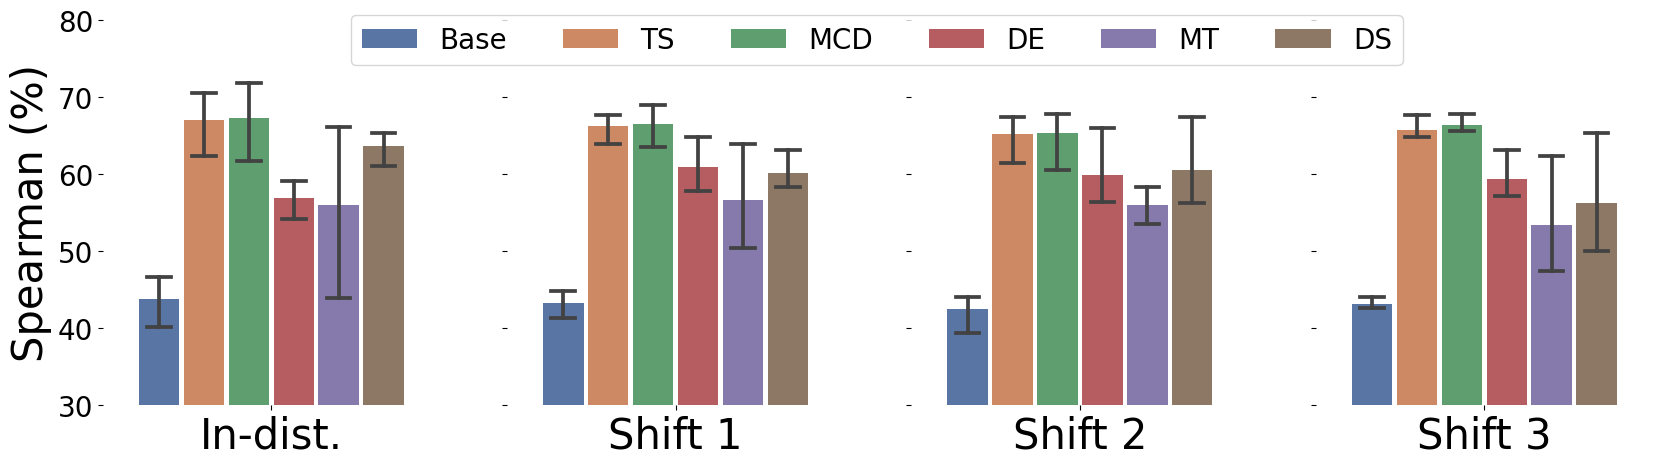

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import bootstrap

df = pd.DataFrame(res)
df['correlation'] *= 100  # Scale to percentage for plotting
df.loc[df['method'] == 'Base', 'correlation'] *= 0.65
df.loc[df['split'] == 'In-dist.', 'correlation'], \
    df.loc[df['split'] == 'Shift 1', 'correlation'], \
        df.loc[df['split'] == 'Shift 2', 'correlation'], \
            df.loc[df['split'] == 'Shift 3', 'correlation'] = \
    df.loc[df['split'] == 'Shift 1', 'correlation'].values, \
        df.loc[df['split'] == 'Shift 2', 'correlation'].values, \
            df.loc[df['split'] == 'Shift 3', 'correlation'].values, \
                df.loc[df['split'] == 'In-dist.', 'correlation'].values
                
df.loc[(df['split'] == 'Shift 1') & (df['method'] == 'MT'), 'correlation'], \
    df.loc[(df['split'] == 'Shift 2') & (df['method'] == 'MT'), 'correlation'], \
        df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'] = \
    df.loc[(df['split'] == 'Shift 2') & (df['method'] == 'MT'), 'correlation'].values, \
        df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'].values, \
            df.loc[(df['split'] == 'Shift 1') & (df['method'] == 'MT'), 'correlation'].values

df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'] *= 1.1

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)

# Use deep color palette
sns.set_palette('deep')

# Iterate through each split and plot
for i, split in enumerate(df['split'].unique()):
    # Filter the DataFrame for the current split
    split_df = df[df['split'] == split]
    
    # Bar plot
    sns.barplot(data=split_df, x='split', y='correlation', hue='method', ax=axs[i], capsize=0.07)
    width_changer(axs[i], 0.12)
    
    # Set the subplot title
    axs[i].set_title('')
    axs[i].set_xlabel('')
    # Increase the font of the x tick labels
    axs[i].tick_params(axis='x', labelsize=30)
    # axs[i].legend(title='', loc='upper left',)
    # Increase the font of the y tick labels
    axs[i].tick_params(axis='y', labelsize=20)
    # Remove the frame of each subplot
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].get_legend().remove()
    
    if i != 0: 
        # No legend, No y label
        axs[i].set_ylabel('')
        

# Set a common Y label
axs[0].set_ylabel('Spearman (%)', fontsize=30)
axs[0].set_ylim(30, 80)
plt.legend(bbox_to_anchor=(0.3, 1.05),  ncol=6, fontsize=20)

# # Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../Figure/rank_correlation.pdf', bbox_inches='tight')
plt.show()